### Phys 629, Fall 2023, University of Mississippi


# Lecture 5, Chapter 3: Probability and Statistical Distributions

Material in this lecture and notebook is based upon the Basic Stats portion of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), the Introduction to Probability & Statistics portion of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18), J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html), and Stephen R. Taylor (https://github.com/VanderbiltAstronomy/astr_8070_s22). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 3. 

***Exercises required for class participation are in <font color='red'>red</font>.***

## Univariate distributions <a class="anchor" id="three"></a>

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form for a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.

### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


<font color='red'>Execute this cell (don't worry about warnings)</font>

/home/subhayu/miniconda3/envs/phys629/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


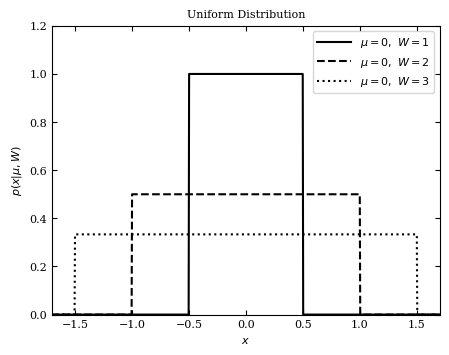

<Figure size 640x480 with 0 Axes>

In [2]:
# Since you're working with a copy of my notebook, you
# may need to change the path below to find the file
%matplotlib inline
%run ../../lectures/scripts/fig_uniform_distribution.py

We can implement [uniform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) in `scipy` as follows.  We'll use the methods listed at the bottom of the link to complete the cell: `dist.rvs(size=N)` which produces `N` random draws from the distribution and `dist.pdf(x)` which returns the value of the pdf at a given $x$. Lots of distributions can be accessed and used in a similar way.  

Create a uniform distribution with parameters `loc=0`,  `scale=2`, and `N=10`.

<font color='red'>Complete and execute the following cell</font>

In [7]:
import scipy
N = 10 # Complete
distU = scipy.stats.uniform(0,2) # Complete
draws = distU.rvs(N) # ten random draws
print(draws)

p = distU.pdf(1) # pdf evaluated at x=1

print(p)

[0.1421297  1.63930968 1.44216154 1.95011731 0.96037996 0.68180912
 0.53664195 1.83253187 1.07653477 1.04688436]
0.5


### Gaussian Distribution

As many of you know, the Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.


We love using Gaussians in physics and astronomy because they can approximate many distributions and are also super easy to work with. **The convolution of two Gaussians results in a Gaussian.**  So $\mathscr{N}(\mu_1,\sigma_1)$ convolved with $\mathscr{N}(\mu_2,\sigma_2)$ is $\mathscr{N}(\mu_1+\mu_2,\sqrt{\sigma_1^2+\sigma_2^2})$.

<font color='red'>Execute this cell</font>

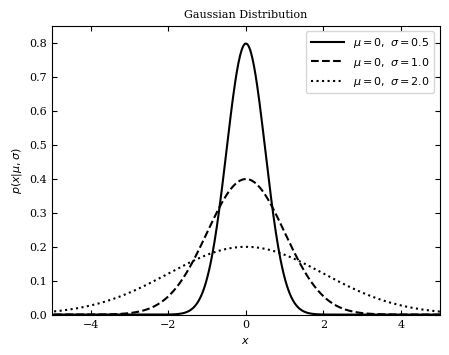

<Figure size 640x480 with 0 Axes>

In [8]:
%run ../../lectures/scripts/fig_gaussian_distribution.py

<font color='red'>Uncomment the next line and run this cell; I just want you to know that this magic function exists.</font>

In [9]:
# %load ../../lectures/scripts/fig_gaussian_distribution.py
"""
Example of a Gaussian distribution
----------------------------------
Figure 3.8.

This shows an example of a gaussian distribution with various parameters.
We'll generate the distribution using::

    dist = scipy.stats.norm(...)

Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:

* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions

* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions

* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution

Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()


<font color='red'>Complete and execute the following cell</font>

In [10]:
distG = scipy.stats.norm(100,15) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(10) # 10 random draws
p = distG.pdf(0) # pdf evaluated at x=0

print(draws)
print(p)

[103.4237866  109.91166079  83.75114788  76.96149966 106.05696416
 114.27842081  84.15718531 119.72087745 102.32337304 108.82454977]
5.940600124901435e-12


<font color='red'>Create a [normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=stats%20norm#scipy.stats.norm) with `loc=100` and `scale=15`. Produce 10 random draws and determine the probability at `x=145`.</font>

<font color='red'>Make a plot of this Gaussian distribution. Plot the pdf from 0 to 200 with a 1000 gridpoints.</font>  

<font color='red'>Complete and execute the following cell</font>

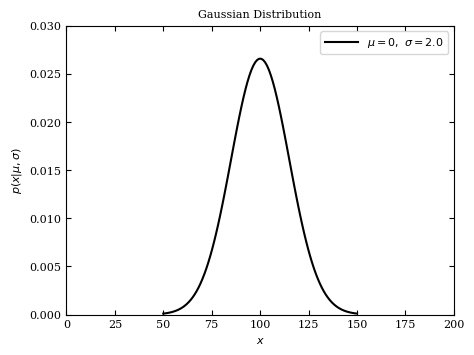

In [11]:
## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)

xgrid = np.linspace(50,150,100) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

The cumulative distribution function, cdf is the integral of pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 

<font color='red'>Execute this cell</font>

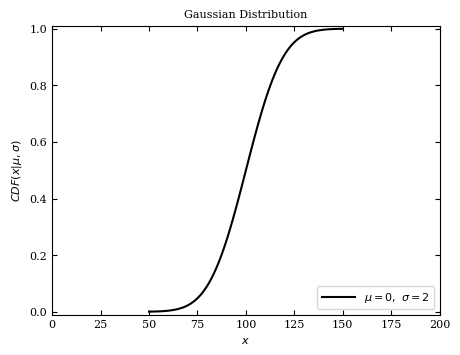

In [12]:
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend(loc=4)

#### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is

$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$

- For $a=b=1\sigma$, we get the familar result of 68.3%.  
- For $a=b=2\sigma$ it is 95.4%.  
- For $a=b=3\sigma$ it is $99.7\%$. 

So we refer to the range $\mu \pm 1\sigma$, $\mu \pm 2\sigma$, and $\mu \pm 3\sigma$ as the 68%, 95%, and $99.7%$ **confidence limits**, respectively. Note that if your distribution is not Gaussian, then these confidence intervals will be different!

***We often still refer to uncertainty regions of distributions as $1\sigma$ or $2\sigma$ regions, which for non-Gaussian distributions usually means (for $1\sigma$) the region enclosing the $16\%$ and $84\%$ quantiles.***

<font color='red'>What is the probability enclosed between $-2\sigma$ and $+4\sigma$? (*Verify first that you get the correct answer for the bullet points above!*)</font>

<font color='red'>Complete and execute the following cell</font>

In [13]:
N=10000
mu=0
sigma=1
distN = scipy.stats.norm(mu, sigma) # Complete
xgrid = np.linspace(-2,4,N) # Complete
dx = (xgrid.max()-xgrid.min())/N
prob = distN.pdf(xgrid)*dx

print(prob.sum())

0.977136709173485


We could do this in various ways. The way you just tried was the most obvious-- brute-force numerical integration with the trapezoidal method. 

But the clever way is to use the cdf, by computing the cdf of the upper integration bound and subtracting the cdf of the lower integration bound.

<font color='red'>Complete and execute the following cell</font>

In [14]:
upper = distN.cdf(4)
lower = distN.cdf(-2)
p = upper-lower
print(p)

0.9772181968099877


### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$, the median is $\exp(\mu)$, and the mode is $\exp(\mu-\sigma^2)$.  Try it.

<font color='red'>Execute this cell</font>

In [15]:
x = scipy.stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))

print(y.mean())
print(x)

1.3504942190959028


The catch here is that stats.norm(0,1) returns an *object* and not something that we can just do math on in the expected manner.  What *can* you do with it?  Try ```dir(x)``` to get a list of all the methods and properties.

In [18]:
# Execute this cell
distLN = scipy.stats.norm(0,1) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5*1), y.mean())

1.6487212707001282 1.6520996902847325


<font color='red'>Repeat the above calculations to verify the equations for the mode and median.</font>

### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would denotes the gamma function, which has closed-form values for integer k.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

<font color='red'>Execute this cell</font>

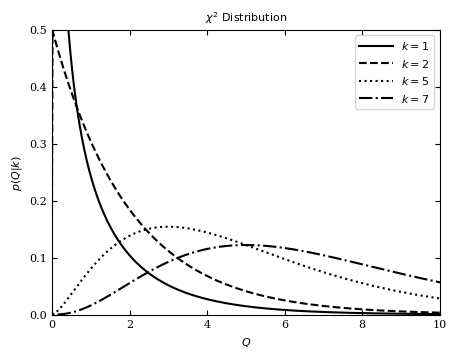

<Figure size 640x480 with 0 Axes>

In [19]:
%run ../../lectures/scripts/fig_chi2_distribution.py

### Chi-squared per degree of freedom

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_\mathrm{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which (for large $k$) is distributed as

$$ p(\chi^2_\mathrm{dof}) \sim \mathscr{N}\left(1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_\mathrm{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.

### Poisson distribution

This is a distribution for a discrete variable, telling you the probability of $k$ events occuring within a certain time when the mean is $\mu$. 

An early and famous example of the use of this distribution was to **model the expected number of Prussian cavalrymen that would be kicked to death by their own horse**. Statistics has many applications...

$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$

where the mean $\mu$ completely characterizes the distribution. The mode is $(\mu-1)$, the standard deviation is $\sqrt{\mu}$, the skewness is $1/\sqrt{\mu}$, and the kurtosis is $1/\mu$.

As $\mu$ increases the Poisson distribution becomes more and more similar to a Gaussian with $\mathcal{N}(\mu,\sqrt{\mu})$. The Poisson distribution is sometimes called the ***law of small numbers*** or ***law of rare events***.

<font color='red'>Complete and execute the following cell for $\mu=3$.</font>

In [22]:
# Practice the Poisson distribution

dist = scipy.stats.poisson(3)

k = dist.rvs(20) # make 20 draws
pmf = dist.pmf(6) # evaluate probability mass function at 6

### The Cauchy (Lorentzian) Distribution
This is a continuous distribution $$p(x| \gamma, \mu) = \frac{1}{\pi\gamma}\Bigg(\frac{\gamma^2}{\gamma^2+(x-\mu)^2}\Bigg)$$

where $\mu$ is location parameter and $\gamma$ is scale parameter. The median and mode of this distribution are equal to $\mu$. 

Because its tails decrease as slowly as $x^{−2}$ for large $|x|$, the mean, variance, standard deviation, and higher moments do not exist for this distribution. Therefore, given a set of measured $x_i$ drawn from the Cauchy distribution, the location and scale parameters cannot be estimated by computing the mean value and standard deviation using standard expressions.

However, one can always compute the mean value for a set of numbers $x_i$, but this mean value will have a large scatter around $\mu$, and this scatter will not decrease with the sample size.

### Student's $t$ Distribution

Another distribution that we'll see later is the Student's $t$ Distribution.

If you have a sample of $N$ measurements, $\{x_i\}$, drawn from a Gaussian distribution, $\mathscr{N}(\mu,\sigma)$, and you apply the transform

$$t = \frac{\overline{x}-\mu}{s/\sqrt{N}},$$

then $t$ will be distributed according to Student's $t$ with the following pdf (for $k$ degrees of freedom):

$$p(x|k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi k} \Gamma(\frac{k}{2})} \left(1+\frac{x^2}{k}\right)^{-\frac{k+1}{2}}$$

As with a Gaussian, Student's $t$ is bell shaped, but has "heavier" tails.

Note the similarity between $t$ and $z$ for a Gaussian (as defined in the $\chi^2$ section above), which reflects the difference between data-derived estimates of the mean and standard deviation and their true values.

In fact, although often approximated as a Gaussian distribution, the mean of a sample actually follows a Student's $t$ distribution. This matters when sample sizes are small, but mostly irrelevant for "Big Data" examples.

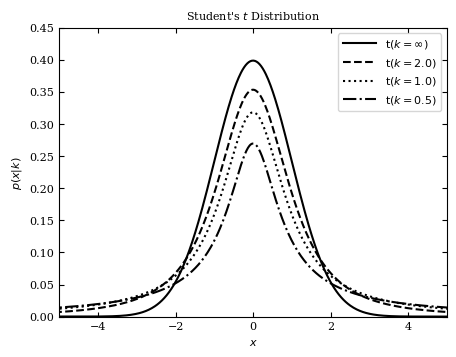

<Figure size 640x480 with 0 Axes>

In [23]:
# Execute this cell
%run ../../lectures/scripts/fig_student_t_distribution.py

### What's the point of all these distributions?

* There are many other distributions that we haven't covered here (see the textbook).

* The point is that we are going to make some measurement. 

* To understand the significance of our measurement, we want to know how likely it is that we would get that measurement in our experiment by random chance. 

* To determine that we need to know the shape of the distribution. Let's say that we find that $x=6$. If our data is $\chi^2$ distributed with 2 degrees of freedom, then we would integrate the $k=2$ curve above from 6 to $\infty$ to determine how likely it is that we would have gotten 6 or larger by chance.  If our distribution was instead $t$ distributed, we would get a *very* different answer.  

Note that it is important that you decide *ahead of time* what the metric will be for deciding whether this result is significant or not.  More on this later, but see [this article](http://fivethirtyeight.com/features/science-isnt-broken/).

**FUN FACT:** "Student" was the pen name of W. S. Gosset, who worked for the Guinness brewery in Dublin, Ireland. He was interested in the statistical analysis of small samples, e.g., the chemical properties of barley when the sample size might be as small as $3$.

![https://thatsmaths.files.wordpress.com/2014/04/gosset-plaque.jpg](https://thatsmaths.files.wordpress.com/2014/04/gosset-plaque.jpg)